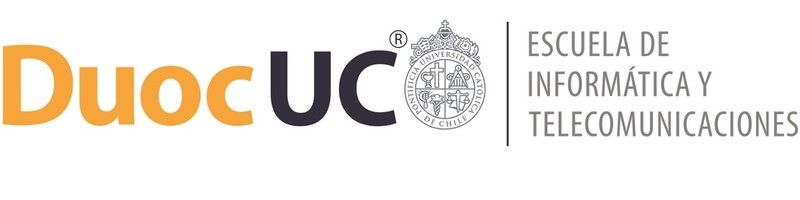

# Metodologia CRISP en Notebook
- Nombrede los integrantes del grupo: Nicolas Ceron, Manuel Hidalgo y Benjamin Barraza
- evaluacion # X
- fecha entrega

## Fase 1: Business Understanding

---



## 1.1: Comprension del Negocio

StarCraft II es un juego de estrategia en tiempo real (RTS) desarrollado por Blizzard Entertainment. Lanzado en 2010, es la secuela del icónico StarCraft original. El juego se desarrolla en un futuro distante, donde tres facciones principales —los terran, zerg y protoss— compiten por el control del sector Koprulu.

En este contexto, el desempeño del jugador se mide mediante un sistema de ligas, que van desde Bronce (nivel básico) hasta GrandMaster y Profesional (nivel experto). Estas ligas se determinan en base al rendimiento individual durante las partidas.

- ......
- ......
- ......


<!-- 11 atributos descriptivos.
  1 etiqueta de [1: enfermedad cardíaca, 0: normal] -->

## 1.2: Objetivo del proyecto

El objetivo de este análisis es comprender el comportamiento de los jugadores en distintos niveles de habilidad y cómo ciertas variables influyen en su desempeño. Se busca construir una base analítica que permita:

Identificar patrones en el comportamiento de juego según el nivel del jugador.

Determinar qué factores tienen mayor influencia en alcanzar ligas más altas.

Posiblemente, construir un modelo predictivo para estimar el nivel de un jugador a partir de sus estadísticas.

## 1.3: Datos Disponibles

GameID: Identificador único de cada partida.

LeagueIndex: Nivel de liga del jugador, donde:

1 = Bronce, 2 = Plata, 3 = Oro, 4 = Diamante, 5 = Maestro, 6 = Gran Maestro, 7 = Profesional (dependiendo del contexto).

Age: Edad del jugador.

HoursPerWeek: Horas promedio que el jugador juega por semana.

TotalHours: Horas totales jugadas por el jugador.

APM (Actions Per Minute): Acciones por minuto realizadas por el jugador (medida de velocidad de juego).

SelectByHotkeys: Proporción de unidades seleccionadas usando atajos de teclado.

AssignToHotkeys: Proporción de veces que el jugador asigna grupos de control a teclas rápidas.

MinimapAttacks: Frecuencia con que el jugador da órdenes de ataque desde el minimapa.

MinimapRightClicks: Cantidad de clics derechos en el minimapa (generalmente para mover unidades).

NumberOfPACs: Número total de agrupaciones de acciones (PAC = "Perception Action Cycle").

GapBetweenPACs: Tiempo promedio entre agrupaciones de acciones.

ActionLatency: Tiempo promedio de reacción entre estímulo y acción.

ActionsInPAC: Número promedio de acciones dentro de cada agrupación.

TotalMapExplored: Proporción del mapa total que el jugador ha explorado durante la partida.

WorkersMade: Número total de unidades recolectoras creadas (por ejemplo, drones o SCVs).

UniqueUnitsMade: Número de tipos distintos de unidades creadas.

ComplexUnitsMade: Número de unidades complejas (costosas o con habilidades especiales) creadas.

ComplexAbilityUsed: Frecuencia de uso de habilidades complejas (como escudos o hechizos).

MaxTimeStamp: Tiempo total en segundos de la duración de la partida.

## 1.4: Kpis mas relevantes en el proyecto

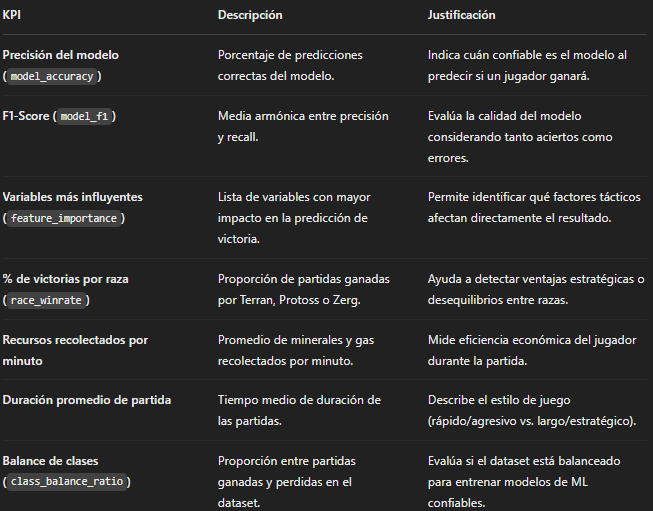

## 1.5: Criterios de Éxito del Negocio

Identificar al menos tres insights clave sobre el comportamiento de los jugadores que puedan ser usados en estrategias de mejora o aprendizaje.

Si se desarrolla un modelo predictivo, que tenga una precisión mínima del 80% al predecir la liga del jugador.

Entregar visualizaciones y conclusiones claras que faciliten la toma de decisiones o el diseño de estrategias en el entorno competitivo del juego.

Aportar valor didáctico o estratégico a jugadores, entrenadores o desarrolladores que analicen el rendimiento en StarCraft II.







----------------------------------------------------------------------------------------

## Fase 2: Data Understanding

In [1]:
#código análisis estadísticos de cada columna, medidas de tendencia central, de segmentación, decribe(), tipos de datos,
#distribucion datos categoricos, distribucion datos numéricos, correlación entre columna,
#detección dupplicados, nulos, aoutliers

 - Explicación de observación (hallazgos). Todo respaldado con gráficos y elementos de análsis


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Ruta del archivo CSV
file_path = "weatherAUS.csv"

# Cargar el archivo 
df = pd.read_csv(file_path)

In [7]:
print(f"Filas: {df.shape[0]} \nColumnas: {df.shape[1]}")

Filas: 142193 
Columnas: 24


-El dataset contiene **142.193  filas** y **24 columnas**.


In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Tipo de datos

In [8]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### Valores nulos

In [9]:
# Cantidad de valores nulos por columna
print(df.isnull().sum())

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


### Estadistica descriptiva

In [10]:
# Estadísticas para todas las variables numéricas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### visualización grafica de variables

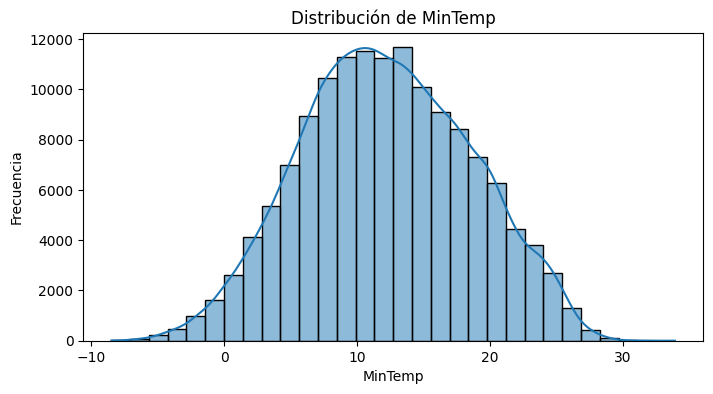

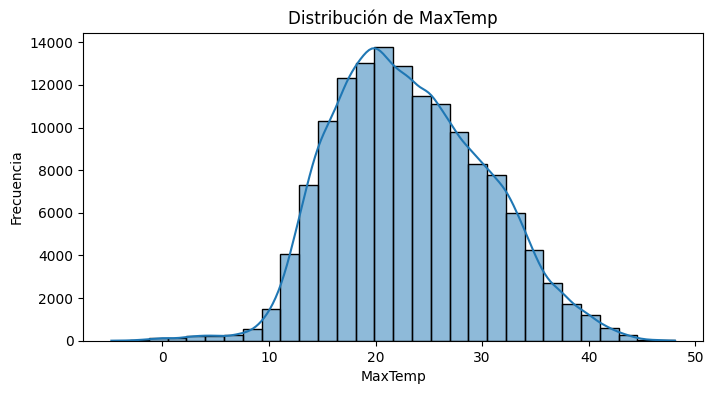

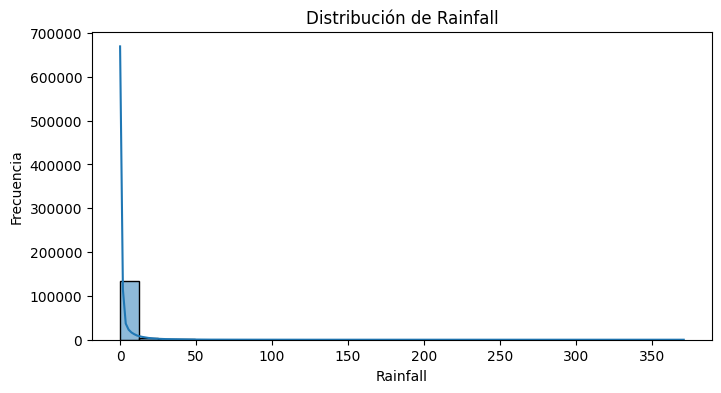

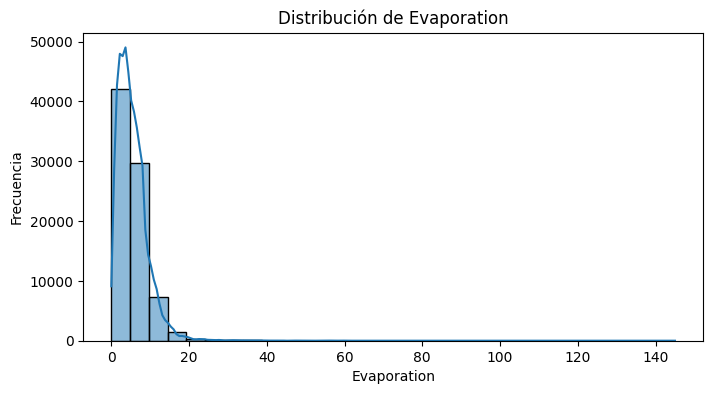

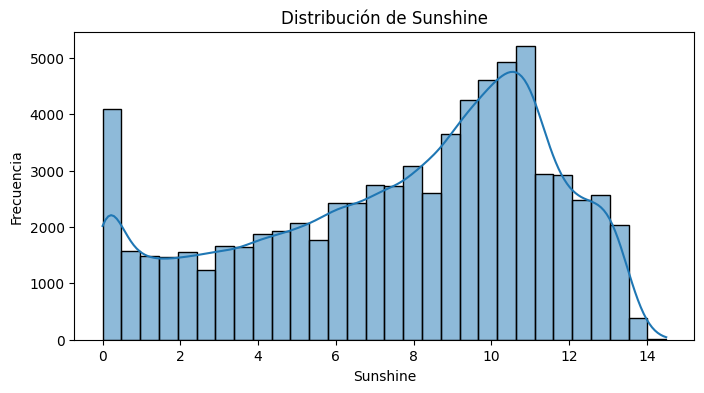

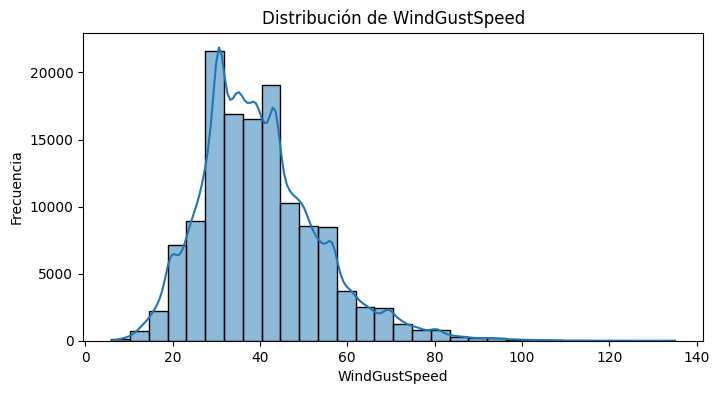

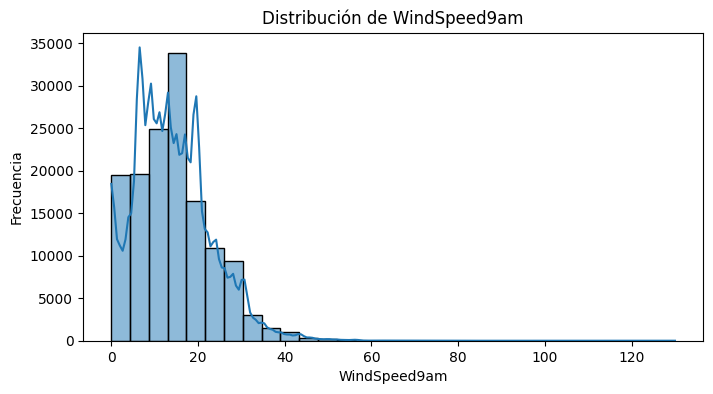

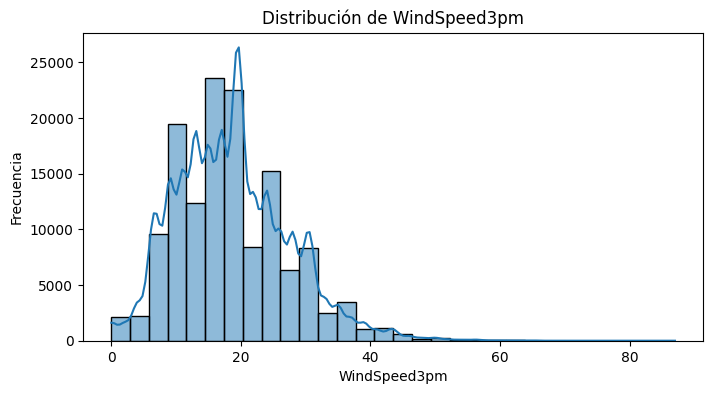

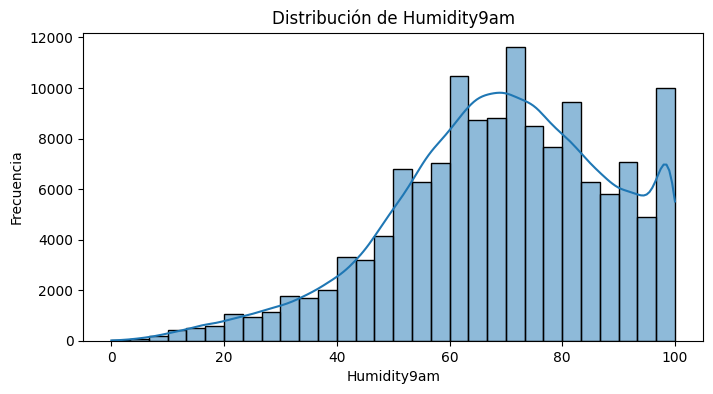

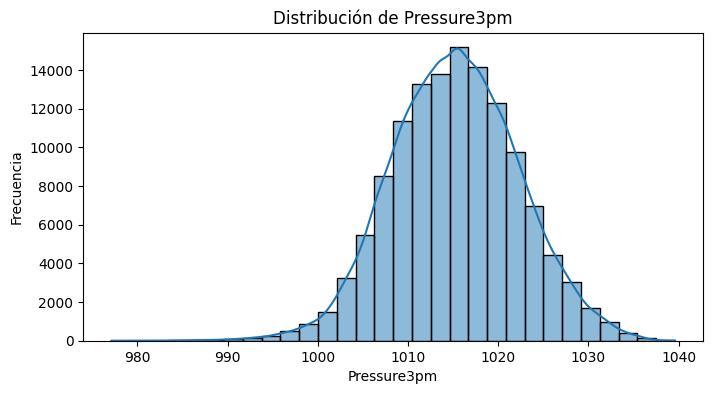

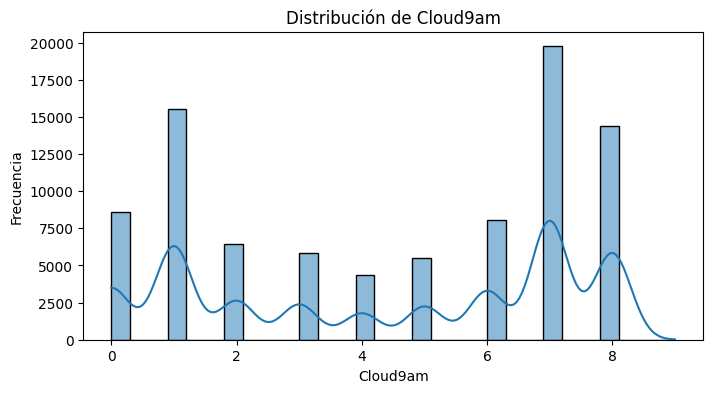

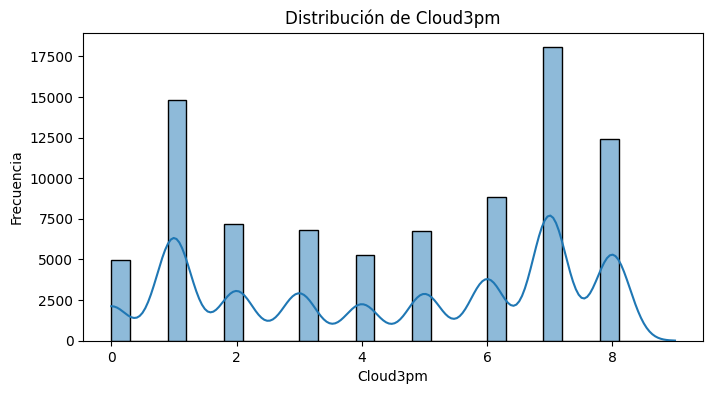

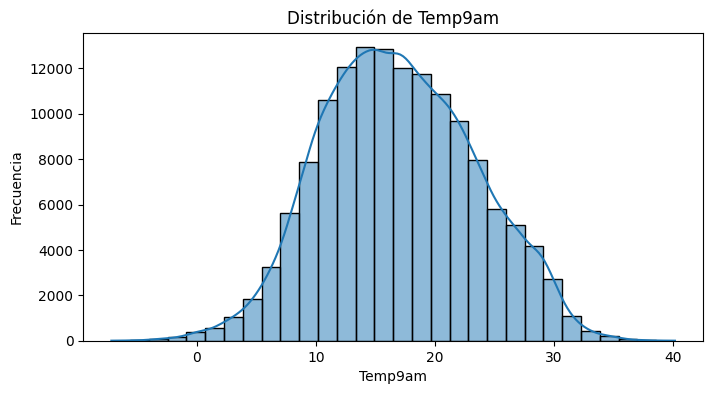

In [11]:
variables_numericas = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am"]

for col in variables_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

### Correlaciones entre variables

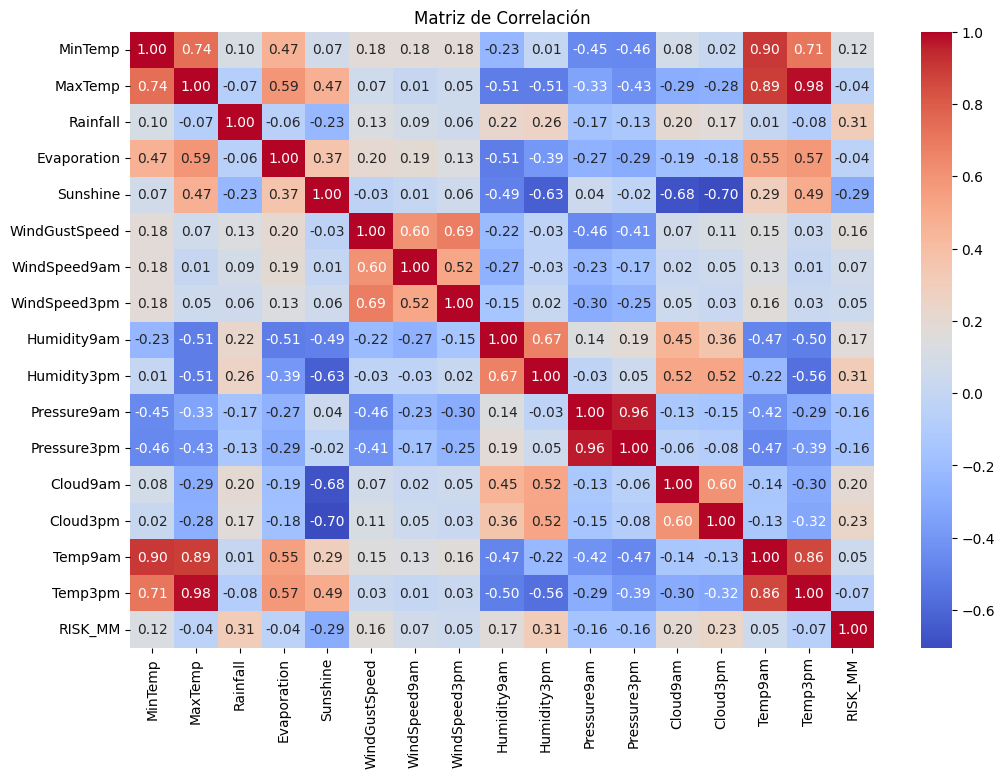

In [12]:
# Matriz de correlación
correlation = df.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


## Conclusiones Fase 2



- desarrollo de las conclusiones

## Fase 3: Data Preparation

## Fase 4: Modeling

### Aprendizaje Supervisado - Regresión

### Aprendizaje Supervisado - Clasificación



## Fase 5: Evaluation

### Aprendizaje Supervisado - Regresión

COMPARACION FINAL




### Aprendizaje Supervisado - Clasificacion



COMPARACION FINAL






CONCLUSION





### Aprendizaje NO Supervisado - Clustering



## Fase 6: Deployment